# Double Square Well Correlation Diagram

This notebook solves the transcendental eigenvalue equation for a single fermion in a double square well potential at different values of well separation in order to plot the correlation diagram. Both wells are of the same width.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Transcendental Eigenvalue Equation

The transcendental eigenvalue equation consists of equations 13.6, 13.7, and 13.15 in the textbook (Quantum States of Atoms, Molecules and Solids by Morrison, Estle, and Lane)

Variables:

- E: energy of a bound state
- d: well separation
- a: well width
- V0: depth of the potential wells
- m: mass of particle


#### Note that the width of the well and the mass of the particle are set to 1 for simplicity

In [2]:
def alpha(E, m):
    '''
    Equation 13.6
    '''
    
    return np.sqrt(2*m*E)/hbar

def beta(E, V0, m):    
    '''
    Equation 13.7
    '''
    
    return np.sqrt(2*m*(V0-E))/hbar

def EigenvalueEquationEven(E, d, a, V0, m):
    '''
    Equation 13.15 for even states
    
    This equation is written in the form term1*term2 - term3 because scipy.optimize.solve() requires 
    the function to be in the form f(x) = 0 (or f(E, args) = 0 in our case)
    '''
    
    term1 = beta(E, V0, m) + alpha(E, m)*( 1/np.tan( alpha(E, m)*a/2 ) )
    
    term2 = beta(E, V0, m) - alpha(E, m)*np.tan(alpha(E, m)*a/2)
    
    # Even solutions:
    term3 = (alpha(E, m)**2 + beta(E, V0, m)**2)*np.exp(-1*beta(E, V0, m)*d)
    
    return term1*term2 - term3  

def EigenvalueEquationOdd(E, d, a, V0, m):
    '''
    Equation 13.15 for odd states
    '''
    
    term1 = beta(E, V0, m) + alpha(E, m)*( 1/np.tan( alpha(E, m)*a/2 ) )
    
    term2 = beta(E, V0, m) - alpha(E, m)*np.tan(alpha(E, m)*a/2)
    
    # Odd solutions:
    term3 = -1*(alpha(E, m)**2 + beta(E, V0, m)**2)*np.exp(-1*beta(E, V0, m)*d)
    
    return term1*term2 - term3


## Constants

In [3]:
h = 6.62607e-34  # 6.62607015×10−34 J⋅s
hbar = h/(2*np.pi)
a = 1  # well width
m = 1 # mass of particle
V0 = ((2*h**2)/(m*a**2))  # in Hartrees, to be consistent with the plot used in the textbook

## Solving for bound state energies with d=0  (single well limit)

The energies are the roots of equation 13.15

In [4]:
# expect 4 roots so x0 should be array of the approximate values of the 4 roots

x0 = np.array([0.05, 0.23, 0.46, 0.68])*V0  # book shows these numbers are the approx values of the roots for E/V0
                                         # so multiply by V0 to get approximate roots of E
d = 0

# even
energies = fsolve(EigenvalueEquationEven, x0, args=(d, a, V0, m))
print("Even energies at d=0:")
print(energies/V0)

# odd
energies = fsolve(EigenvalueEquationOdd, x0, args=(d, a, V0, m))
print("\nOdd energies at d=0:")
print(energies/V0)

Even energies at d=0:
[0.01340197 0.12028115 0.33193685 0.64170764]

Odd energies at d=0:
[0.05355338 0.21326004 0.47535754 0.82660429]


# Solving for energies at different well separations

In [5]:
n = 1000  # number of d values to use
d = np.linspace(0, 4, n)*a  # will find E values for d/a ranging from zero to 4
x0 = np.array([0.05, 0.23, 0.46, 0.68])*V0

# initialize arrays of energies
even_energies = np.zeros((n, 4))
odd_energies = np.zeros((n, 4))

for i in range(len(d)):
    even_energies[i] = fsolve(EigenvalueEquationEven, x0, args=(d[i], a, V0, m))/V0
    odd_energies[i] = fsolve(EigenvalueEquationOdd, x0, args=(d[i], a, V0, m))/V0


In [6]:
even_energies[0]

array([0.01340197, 0.12028115, 0.33193685, 0.64170764])

In [7]:
odd_energies[0]

array([0.05355338, 0.21326004, 0.47535754, 0.82660429])

In [8]:
# Take the transpose so that roots[i] corresponds to an array of the values of the ith energy level as a function of d/a
even_energies = even_energies.T
odd_energies = odd_energies.T

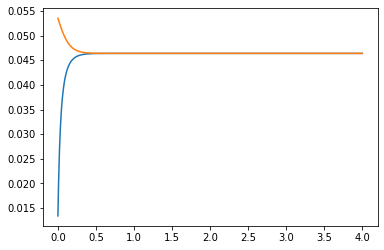

In [9]:
# lowest even and odd energy levels
plt.plot(d/a, even_energies[0])
plt.plot(d/a, odd_energies[0])
plt.show()

# Plotting the Correlation Diagram

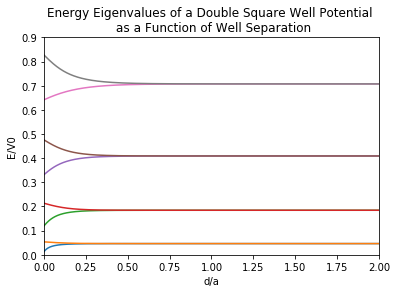

In [10]:
# the whole correlation diagram
plt.plot(d/a, even_energies[0])
plt.plot(d/a, odd_energies[0])
plt.plot(d/a, even_energies[1])
plt.plot(d/a, odd_energies[1])
plt.plot(d/a, even_energies[2])
plt.plot(d/a, odd_energies[2])
plt.plot(d/a, even_energies[3])
plt.plot(d/a, odd_energies[3])

plt.xlabel("d/a")
plt.ylabel("E/V0")
plt.title("Energy Eigenvalues of a Double Square Well Potential \n as a Function of Well Separation")
plt.xlim([0,2])
plt.ylim([0,0.9])
plt.show()
